In [1]:
#pip install autokeras

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

In [14]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [15]:
training_data['WELL'] = training_data['WELL'].astype('category')

In [16]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000
mean,1107.267206,555.288869,84.581062,7.096406,2.044410,0.438939,2.444864,0.441174,2721.519760
std,350.079884,228.594505,42.316679,3.527867,7.855950,0.454943,0.151188,0.456314,802.882038
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,949.906203,431.554655,57.870251,5.000000,0.206200,0.150676,2.359800,0.151492,2072.536377
50%,1122.578917,580.037389,80.375000,6.000000,0.281600,0.394073,2.473600,0.403218,2623.108887
75%,1249.987126,677.756813,105.747952,10.000000,0.353700,0.674850,2.557300,0.687541,3210.812256
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [17]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

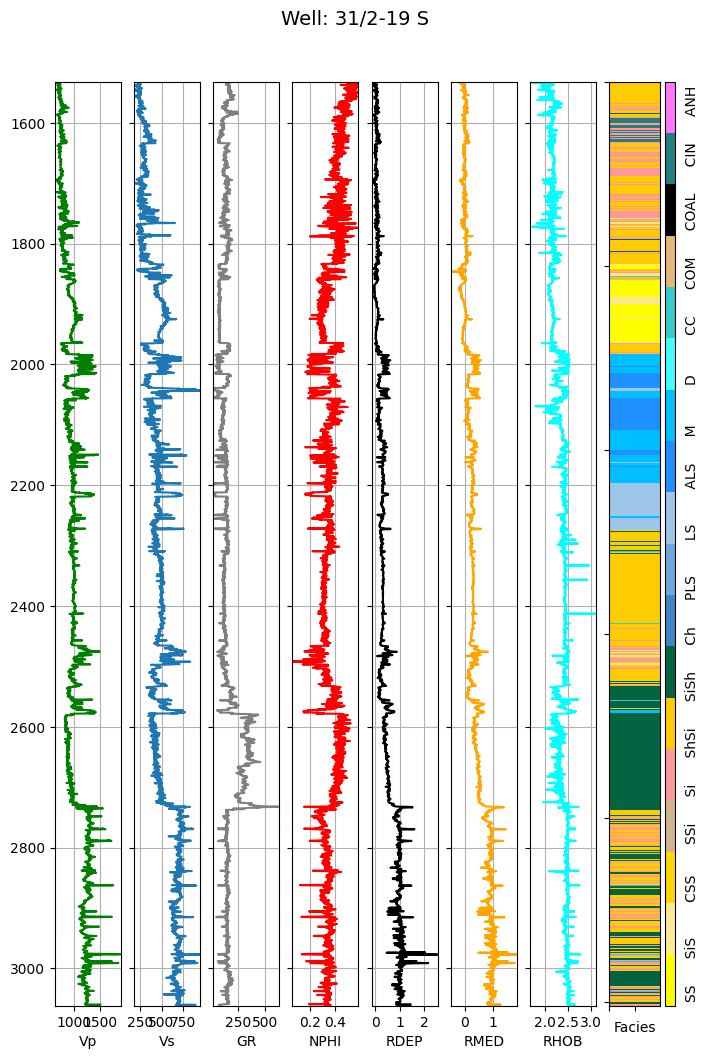

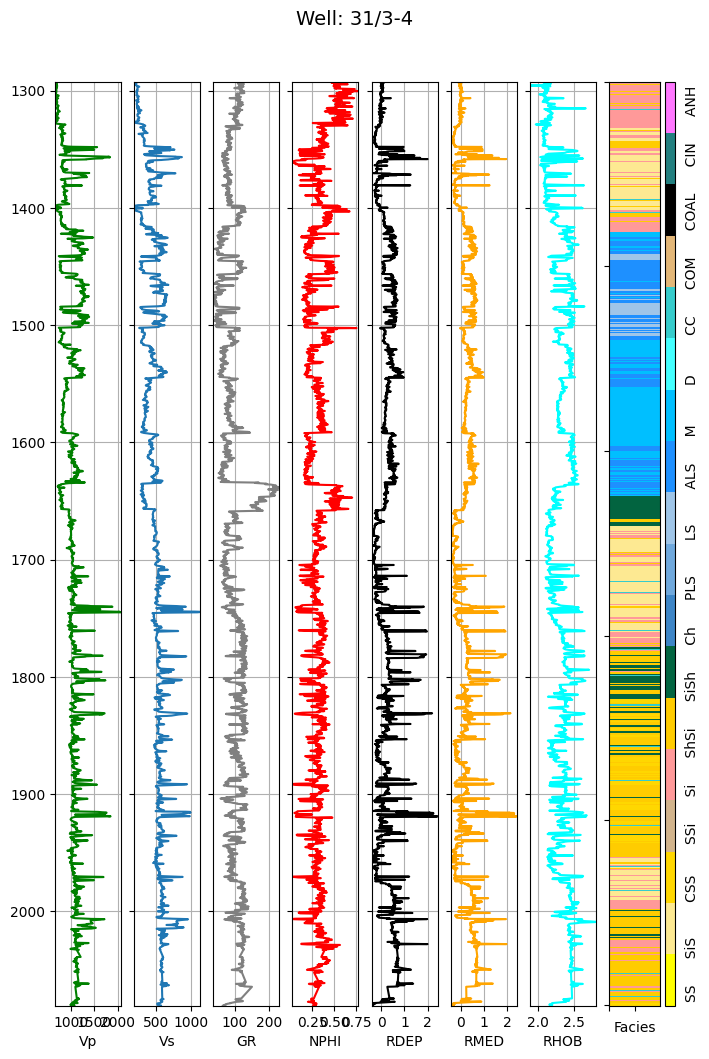

In [18]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/3-4'],
    facies_colors)

SS       8282
SiS     12448
CSS      4001
SSi      6174
Si      32512
ShSi    37120
SiSh    25963
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2968
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

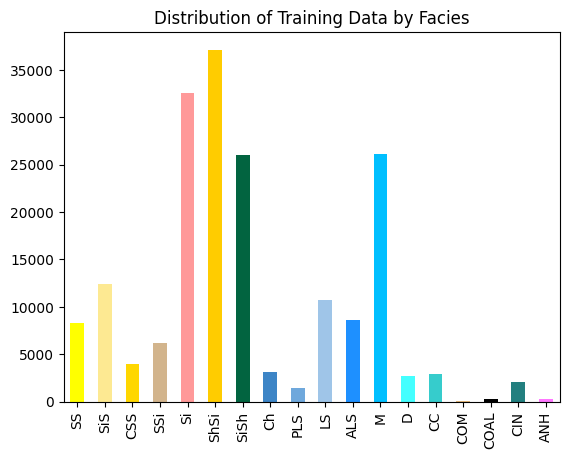

In [19]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [20]:
blind = training_data[training_data['WELL'] == '15/9-23']
training_data = training_data[training_data['WELL'] != '15/9-23']

In [21]:
blind = blind.reset_index(drop=True)
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,FaciesLabels
0,864.354985,373.319164,96.910202,6,0.3916,-0.148803,2.4802,-0.176721,15/9-23,2315.461914,ShSi
1,862.738304,367.195897,108.976501,6,0.3911,-0.141937,2.5022,-0.174280,15/9-23,2315.614502,ShSi
2,859.731392,356.882324,126.231796,6,0.4078,-0.137453,2.4731,-0.153141,15/9-23,2315.766846,ShSi
3,852.451690,352.642505,149.429504,6,0.4077,-0.138346,2.4813,-0.136439,15/9-23,2315.919189,ShSi
4,831.515102,343.942351,163.915497,6,0.4260,-0.152181,2.4709,-0.169219,15/9-23,2316.071533,ShSi
...,...,...,...,...,...,...,...,...,...,...,...
5713,735.225981,355.084999,68.602997,5,0.1447,0.107549,2.5170,0.096051,15/9-23,3193.591064,Si
5714,732.695169,360.638619,70.434700,6,0.1382,0.193456,2.4987,0.168952,15/9-23,3193.743408,ShSi
5715,733.337295,368.611133,75.727898,6,0.1450,0.256444,2.5086,0.243603,15/9-23,3193.895752,ShSi
5716,737.799420,377.090986,85.059097,6,0.1523,0.235026,2.5539,0.270257,15/9-23,3194.048096,ShSi


In [22]:
FaciesLabels = blind['FaciesLabels']
FaciesLabels

0       ShSi
1       ShSi
2       ShSi
3       ShSi
4       ShSi
        ... 
5713      Si
5714    ShSi
5715    ShSi
5716    ShSi
5717    ShSi
Name: FaciesLabels, Length: 5718, dtype: object

In [23]:
training_data = training_data.reset_index(drop=True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,FaciesLabels
0,1227.564418,631.532409,71.255630,9,0.516923,0.053650,2.260746,-0.045898,16/10-3 Tyr Central,2138.781738,PLS
1,1244.661696,637.020932,65.967529,9,0.370931,0.055301,2.425275,-0.049910,16/10-3 Tyr Central,2138.934082,PLS
2,1259.729307,641.868690,66.505676,9,0.290456,0.056478,2.332144,-0.050302,16/10-3 Tyr Central,2139.086426,PLS
3,1263.544919,643.663097,67.770607,9,0.268130,0.059047,2.328959,-0.048802,16/10-3 Tyr Central,2139.239014,PLS
4,1253.742062,643.175869,66.588562,9,0.292730,0.041725,2.320370,-0.060244,16/10-3 Tyr Central,2139.391357,PLS
...,...,...,...,...,...,...,...,...,...,...,...
178996,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469,SS
178997,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812,SS
178998,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156,SS
178999,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500,SS


In [24]:
correct_labels = training_data['Vs'].values
well_name = training_data['WELL']
feature_vectors = training_data.drop(['Vp','Vs','WELL', 'Depth','Facies','FaciesLabels'], axis=1)
depth = training_data['Depth']
feature_vectors.describe()

,GR,NPHI,RDEP,RHOB,RMED
count,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000
mean,85.024165,2.103066,0.446440,2.444573,0.448445
std,41.682120,7.973450,0.456329,0.151355,0.457802
min,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,58.656017,0.208600,0.157721,2.359100,0.159086
50%,80.702522,0.283300,0.400153,2.473178,0.408935
75%,106.062500,0.355800,0.682443,2.557600,0.694351
max,1163.366455,61.007858,4.466433,3.217700,4.000000


In [25]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [26]:
# Perform MinMax scaler for the dataset

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(feature_vectors)

In [27]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat['Well Name'] = well_name
df_scaled_feat['Vs'] = correct_labels
df_scaled_feat

,GR,NPHI,RDEP_log10,RHOB,RMED_log10,Well Name,Vs
0,-0.330323,-0.198929,-0.860764,-1.214547,-1.079820,16/10-3 Tyr Central,631.532409
1,-0.457191,-0.217238,-0.857147,-0.127503,-1.088584,16/10-3 Tyr Central,637.020932
2,-0.444280,-0.227331,-0.854568,-0.742820,-1.089441,16/10-3 Tyr Central,641.868690
3,-0.413933,-0.230131,-0.848937,-0.763863,-1.086165,16/10-3 Tyr Central,643.663097
4,-0.442292,-0.227046,-0.886897,-0.820611,-1.111157,16/10-3 Tyr Central,643.175869
...,...,...,...,...,...,...,...
178996,-1.304955,-0.242878,-1.155644,-0.728989,-1.204609,7/1-2 S,786.915040
178997,-1.256679,-0.241650,-1.123808,-0.519477,-1.167882,7/1-2 S,786.938048
178998,-1.156196,-0.240797,-1.076674,-0.431935,-1.115689,7/1-2 S,786.934316
178999,-1.037955,-0.241721,-1.057955,-0.556449,-1.091363,7/1-2 S,786.996119


In [28]:
df_scaled_feat['Well Name'].unique()

['16/10-3 Tyr Central', '16/10-5 Isbjoern', '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6', ..., '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S']
Length: 42
Categories (43, object): ['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern', '16/2-11 A Johan Sverdrup Appr', ..., '35/9-7', '35/9-8', '35/9-9', '7/1-2 S']

In [29]:
scaled_features = df_scaled_feat

In [30]:
scaled_features['Depth'] = depth
scaled_features

,GR,NPHI,RDEP_log10,RHOB,RMED_log10,Well Name,Vs,Depth
0,-0.330323,-0.198929,-0.860764,-1.214547,-1.079820,16/10-3 Tyr Central,631.532409,2138.781738
1,-0.457191,-0.217238,-0.857147,-0.127503,-1.088584,16/10-3 Tyr Central,637.020932,2138.934082
2,-0.444280,-0.227331,-0.854568,-0.742820,-1.089441,16/10-3 Tyr Central,641.868690,2139.086426
3,-0.413933,-0.230131,-0.848937,-0.763863,-1.086165,16/10-3 Tyr Central,643.663097,2139.239014
4,-0.442292,-0.227046,-0.886897,-0.820611,-1.111157,16/10-3 Tyr Central,643.175869,2139.391357
...,...,...,...,...,...,...,...,...
178996,-1.304955,-0.242878,-1.155644,-0.728989,-1.204609,7/1-2 S,786.915040,3159.605469
178997,-1.256679,-0.241650,-1.123808,-0.519477,-1.167882,7/1-2 S,786.938048,3159.757812
178998,-1.156196,-0.240797,-1.076674,-0.431935,-1.115689,7/1-2 S,786.934316,3159.910156
178999,-1.037955,-0.241721,-1.057955,-0.556449,-1.091363,7/1-2 S,786.996119,3160.062500


In [31]:
# blind = scaled_features[scaled_features['Well Name'] == '15/9-23']
# scaled_features = scaled_features[scaled_features['Well Name'] != '15/9-23']

In [32]:
# blind_take_FaciesLabels = training_data[training_data['WELL'] == '15/9-23']
# blind_take_FaciesLabels['FaciesLabels']
# FaciesLabels = blind_take_FaciesLabels['FaciesLabels']
# FaciesLabels

In [33]:
# scaled_features

In [34]:
# blind

In [35]:
correct_labels = scaled_features['Vs']
scaled_features = scaled_features.drop(['Vs','Well Name','Depth'], axis = 1)

In [36]:
scaled_features

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,-0.330323,-0.198929,-0.860764,-1.214547,-1.079820
1,-0.457191,-0.217238,-0.857147,-0.127503,-1.088584
2,-0.444280,-0.227331,-0.854568,-0.742820,-1.089441
3,-0.413933,-0.230131,-0.848937,-0.763863,-1.086165
4,-0.442292,-0.227046,-0.886897,-0.820611,-1.111157
...,...,...,...,...,...
178996,-1.304955,-0.242878,-1.155644,-0.728989,-1.204609
178997,-1.256679,-0.241650,-1.123808,-0.519477,-1.167882
178998,-1.156196,-0.240797,-1.076674,-0.431935,-1.115689
178999,-1.037955,-0.241721,-1.057955,-0.556449,-1.091363


In [37]:
# scaled_features.min(axis=0)
# scaled_features

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_labels, test_size=0.2, random_state=123)

In [39]:
x_train

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
33785,-0.359433,-0.246088,-0.070329,0.421704,-0.073370
13507,-1.074450,-0.238162,-0.344214,-0.230408,-0.348753
125379,0.336201,-0.233822,0.118972,0.755359,0.198190
152068,-0.347542,-0.252063,4.125057,-2.382245,3.630465
51068,3.785498,-0.212527,0.086703,-0.809841,0.072657
...,...,...,...,...,...
146449,-0.131859,-0.227526,1.405664,0.388594,1.333707
119906,-0.304968,4.285879,-0.472333,0.267882,-0.365975
17730,-1.539914,-0.240745,0.171079,-0.071249,0.146644
28030,-0.695234,-0.196411,-1.398918,-1.682627,-1.447080


In [40]:
# x_train_Vp          = x_train.Vp.to_numpy()
# x_train_Vs          = x_train.Vs.to_numpy()
x_train_GR          = x_train.GR.to_numpy()
x_train_NPHI        = x_train.NPHI.to_numpy()
x_train_RDEP_log10  = x_train.RDEP_log10.to_numpy()
x_train_RHOB        = x_train.RHOB.to_numpy()
x_train_RMED_log10  = x_train.RMED_log10.to_numpy()

In [41]:
# x_test_Vp          = x_test.Vp.to_numpy()
# x_test_Vs          = x_test.Vs.to_numpy()
x_test_GR          = x_test.GR.to_numpy()
x_test_NPHI        = x_test.NPHI.to_numpy()
x_test_RDEP_log10  = x_test.RDEP_log10.to_numpy()
x_test_RHOB        = x_test.RHOB.to_numpy()
x_test_RMED_log10  = x_test.RMED_log10.to_numpy()

In [42]:
def make_train_matrix(n):
    i = 0
    test = np.ones((len(x_train_GR), 5, 1))
    while i <= n:
        x_train_ = x_train.iloc[[i]]
        x_train_ = x_train_.to_numpy()
        x_train_ = x_train_.reshape((5,1))
        test[i,:,:] = x_train_
        x_train_new = test 
        i = i + 1
    return x_train_new

In [43]:
def make_test_matrix(n):
    i = 0
    test = np.ones((len(x_test_GR), 5, 1))
    while i <= n:
        x_test_ = x_test.iloc[[i]]
        x_test_ = x_test_.to_numpy()
        x_test_ = x_test_.reshape((5,1))
        test[i,:,:] = x_test_
        x_test_new = test 
        i = i + 1
    return x_test_new

In [44]:
x_train_new = make_train_matrix(len(x_train_GR)-1)
x_train_new

array([[[-0.35943252],
        [-0.24608808],
        [-0.07032924],
        [ 0.42170382],
        [-0.07336981]],

       [[-1.0744497 ],
        [-0.23816157],
        [-0.34421424],
        [-0.23040779],
        [-0.34875251]],

       [[ 0.33620102],
        [-0.23382234],
        [ 0.11897166],
        [ 0.75535854],
        [ 0.19819016]],

       ...,

       [[-1.53991439],
        [-0.24074547],
        [ 0.17107914],
        [-0.07124944],
        [ 0.146644  ]],

       [[-0.69523449],
        [-0.19641057],
        [-1.39891802],
        [-1.68262724],
        [-1.44708019]],

       [[-0.52004131],
        [-0.23310746],
        [-0.84631336],
        [-0.78870799],
        [-0.8672375 ]]])

In [45]:
x_test_new = make_test_matrix(len(x_test_GR)-1)
x_test_new

array([[[-0.4542598 ],
        [-0.23598755],
        [ 0.36087927],
        [ 0.20929002],
        [ 0.40165465]],

       [[-1.1118507 ],
        [-0.23218933],
        [-0.983006  ],
        [-1.29205779],
        [-1.60541015]],

       [[-0.11332865],
        [-0.22129322],
        [ 1.27278681],
        [ 0.53864751],
        [ 1.23999044]],

       ...,

       [[-0.86583322],
        [-0.2289938 ],
        [-1.12599743],
        [-0.50063577],
        [-1.11363908]],

       [[-0.90365841],
        [-0.24977533],
        [ 0.61406272],
        [ 0.45672124],
        [ 0.82630702]],

       [[-1.24551509],
        [-0.23982979],
        [-1.14949482],
        [-0.58256047],
        [-1.1920792 ]]])

In [46]:
np.info(x_train_new)

class:  ndarray
shape:  (143200, 5, 1)
strides:  (40, 8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2306e050040
byteorder:  little
byteswap:  False
type: float64


In [47]:
np.info(x_test_new)

class:  ndarray
shape:  (35801, 5, 1)
strides:  (40, 8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2306d3de040
byteorder:  little
byteswap:  False
type: float64


In [48]:
x_train = x_train_new
x_test = x_test_new
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [49]:
np.info(y_train)

class:  ndarray
shape:  (143200,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x2306d2a8040
byteorder:  little
byteswap:  False
type: float64


In [50]:
np.info(y_test)

class:  ndarray
shape:  (35801,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x23069bbd8e0
byteorder:  little
byteswap:  False
type: float64


In [51]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# AutoKeras for 1D CNN

In [52]:
from autokeras import ImageClassifier
# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28), for MNIST
print(y_train.shape)  # (60000,), for MNIST
# print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(143200, 5, 1)
(143200,)


In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143200, 5, 1)
(35801, 5, 1)
(143200,)
(35801,)


In [54]:
# # Initialize the image classifier.
# clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# # Feed the image classifier with training data.
# clf.fit(x_train, y_train, epochs=5)


# # Predict with the best model.
# predicted_y = clf.predict(x_test)
# print(predicted_y)


# # Evaluate the best model with testing data ss
# print(clf.evaluate(x_test, y_test))

In [55]:
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ImageBlock(block_type='vanilla')(output_node)
# output_node = ak.ConvBlock()(output_node)
# output_node = ak.ImageBlock(block_type='vanilla')(output_node)
# output_node = ak.ConvBlock()(output_node)
# output_node2 = ak.ResNetBlock(version="v2")(output_node)
# output_node = ak.Merge()([output_node1, output_node2])
# output_node = ak.Merge()(output_node)
# output_node = ak.ClassificationHead()(output_node)
output_node = ak.RegressionHead()(output_node)

reg_cnn = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=100
)

# Feed the image classifier with training data.
reg_cnn.fit(x_train, y_train, epochs=1)


# Predict with the best model.
predicted_y = reg_cnn.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data ss
print(reg_cnn.evaluate(x_test, y_test))

Trial 100 Complete [01h 08m 02s]
val_loss: 25158.408203125

Best val_loss So Far: 24813.076171875
Total elapsed time: 1d 01h 24m 01s
INFO:tensorflow:Oracle triggered exit
4475/4475 [==============================] - 2018s 451ms/step - loss: 38162.8945 - mean_squared_error: 38162.8945


INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


1119/1119 [==============================] - 47s 42ms/step
[[586.6476 ]
 [621.16846]
 [721.5758 ]
 ...
 [493.83606]
 [662.6078 ]
 [575.3093 ]]
1119/1119 [==============================] - 51s 45ms/step - loss: 27084.0781 - mean_squared_error: 27084.0781
[27084.078125, 27084.078125]


In [56]:
model = reg_cnn.export_model()
model.summary()
# numpy array in object (mixed type) is not supported.s
# convert it to unicode.

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

# try:
#     model.save("model_autokeras_facies_best.h5")
# except Exception:
#     model.save("model_autokeras_facies_best", save_format="tf")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 5, 1)             0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 5, 1, 1)          0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 5, 1, 1)          3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 5, 1, 256)         12800     
                                                             

In [57]:
test_pred = reg_cnn.predict(x_test)
train_pred = reg_cnn.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

4475/4475 [==============================] - 173s 39ms/step
Test set evaluation:
_____________________________________
MAE: 80.56666267421353
MSE: 27084.093003925565
RMSE: 164.57245517985555
R2 Square 0.4988854119744961
__________________________________
Train set evaluation:
_____________________________________
MAE: 80.3449256416105
MSE: 25765.937590878915
RMSE: 160.5177173737495
R2 Square 0.5100560628218491
__________________________________


## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [58]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,FaciesLabels
0,864.354985,373.319164,96.910202,6,0.3916,-0.148803,2.4802,-0.176721,15/9-23,2315.461914,ShSi
1,862.738304,367.195897,108.976501,6,0.3911,-0.141937,2.5022,-0.174280,15/9-23,2315.614502,ShSi
2,859.731392,356.882324,126.231796,6,0.4078,-0.137453,2.4731,-0.153141,15/9-23,2315.766846,ShSi
3,852.451690,352.642505,149.429504,6,0.4077,-0.138346,2.4813,-0.136439,15/9-23,2315.919189,ShSi
4,831.515102,343.942351,163.915497,6,0.4260,-0.152181,2.4709,-0.169219,15/9-23,2316.071533,ShSi
...,...,...,...,...,...,...,...,...,...,...,...
5713,735.225981,355.084999,68.602997,5,0.1447,0.107549,2.5170,0.096051,15/9-23,3193.591064,Si
5714,732.695169,360.638619,70.434700,6,0.1382,0.193456,2.4987,0.168952,15/9-23,3193.743408,ShSi
5715,733.337295,368.611133,75.727898,6,0.1450,0.256444,2.5086,0.243603,15/9-23,3193.895752,ShSi
5716,737.799420,377.090986,85.059097,6,0.1523,0.235026,2.5539,0.270257,15/9-23,3194.048096,ShSi


In [59]:
y_blind = blind['Vs'].values
well_features = blind.drop(['Vp','Vs','FaciesLabels', 'Facies', 'WELL', 'Depth'], axis=1)
# x_blind = well_features
x_blind = scaler.transform(well_features)

In [60]:
x_blind

array([[ 2.85159929e-01, -2.14646142e-01, -1.30442150e+00,
         2.35386893e-01, -1.36558527e+00],
       [ 5.74644562e-01, -2.14708853e-01, -1.28937578e+00,
         3.80739897e-01, -1.36025141e+00],
       [ 9.88619261e-01, -2.12614396e-01, -1.27954868e+00,
         1.88476468e-01, -1.31407717e+00],
       ...,
       [-2.23028321e-01, -2.45573871e-01, -4.16360164e-01,
         4.23025439e-01, -4.47446978e-01],
       [ 8.38069296e-04, -2.44658330e-01, -4.63294281e-01,
         7.22322766e-01, -3.89224853e-01],
       [ 1.53575490e-01, -2.43140790e-01, -6.07570807e-01,
         9.75371267e-01, -5.29302130e-01]])

In [61]:
y_pred_CNN_1 = reg_cnn.predict(x_blind)

179/179 [==============================] - 7s 39ms/step


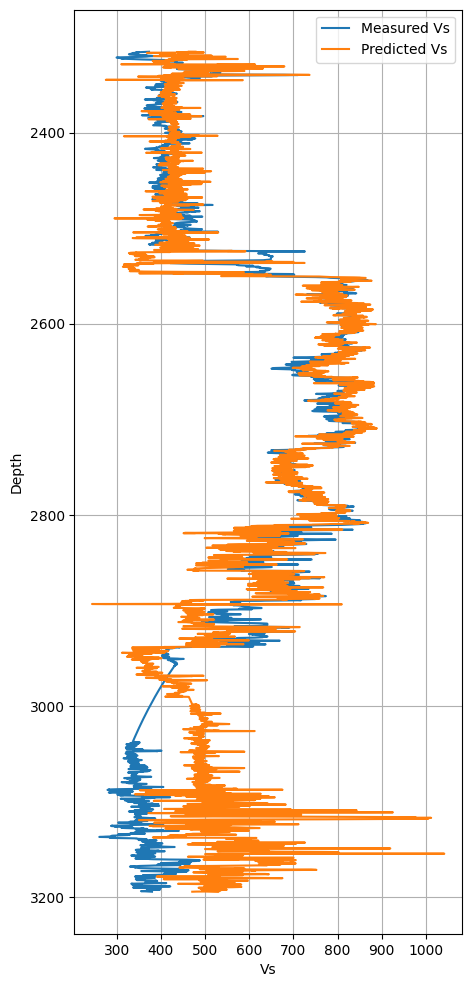

In [62]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_CNN_1,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vs_pred_6.png', dpi=100)

In [63]:
y_pred_CNN_1 = np.squeeze(y_pred_CNN_1)

In [64]:
y_pred_CNN_1

array([463.2937 , 480.69147, 456.16284, ..., 531.4463 , 481.15256,
       471.12656], dtype=float32)

In [65]:
blind_meas = blind['Vs'].to_numpy()
blind_meas

array([373.31916373, 367.19589657, 356.88232446, ..., 368.61113314,
       377.09098609, 380.05588102])

In [66]:
print_evaluate(blind_meas, y_pred_CNN_1)

MAE: 74.1205255787221
MSE: 11882.3306188442
RMSE: 109.00610358527727
R2 Square 0.6357757281590501
__________________________________


In [67]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_CNN_1 / blind_meas
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_CNN_1,blind_meas)

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 17.37693987616592
Pearson = 0.815118029580966


In [69]:
DF = pd.DataFrame(y_pred_CNN_1)
DF.to_csv("well_15_Vs_pred_CNN2_T100_E1.csv")